In [38]:
!pip3 install matplotlib

In [39]:
import wave
import numpy as np
import matplotlib.pyplot as plt

origData = []
FILTER_SIZE = 31

In [40]:
wfOrig = wave.open("input.wav", 'r')
origCh = wfOrig.getnchannels()
origSmpl = wfOrig.getsampwidth()
origRate = wfOrig.getframerate()
origNFrames = wfOrig.getnframes()
origData = wfOrig.readframes(origNFrames)
wfOrig.close()
print(f"Orig\n channels: {origCh}\n samples width: {origSmpl}\n frame rate: {origRate}\n frames: {origNFrames}")

Orig
 channels: 1
 samples width: 2
 frame rate: 8000
 frames: 1073741824


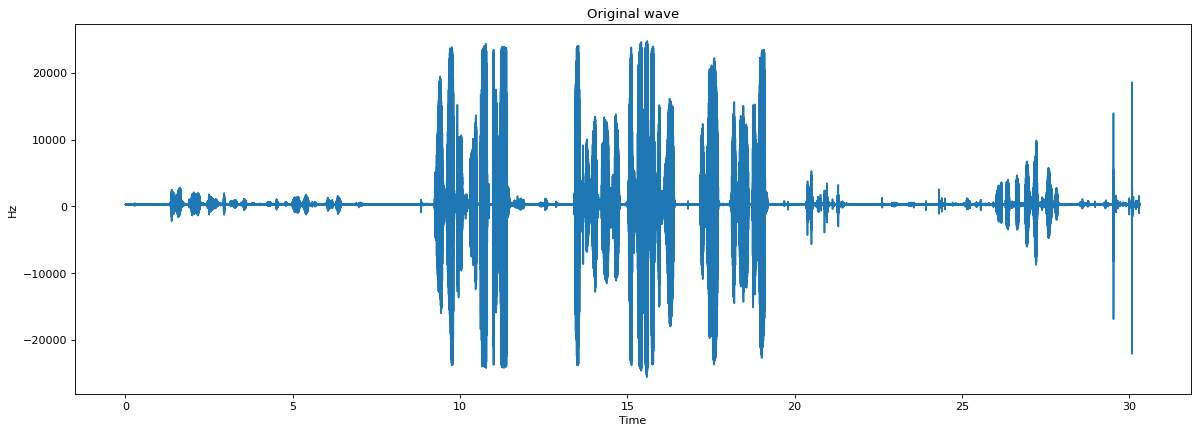

In [56]:
origPlotData = np.frombuffer(origData, np.int16)
origDataLen = len(origPlotData)
time = np.linspace(0, origDataLen / origRate, num = origDataLen)
plt.figure(figsize=(18, 6), dpi=80)
plt.xlabel("Time")
plt.ylabel("Hz")
plt.title("Original wave")
plt.plot(time, origPlotData)
plt.show()

In [66]:
class GaussianFilter:
    m_sigma = 0.0
    m_weights = []
    m_filterSize = 0
    
    def __init__(self, filterSize: int):
        self.m_filterSize = filterSize
        self.m_sigma = (((float(self.m_filterSize) / 2.0) - 1.0) / 3.0) + (1.0 / 3.0)
        self.m_weights = np.zeros(filterSize)
        totalWeight = 0.0
        offset = self.m_filterSize / 2
        c1 = 1.0 / (self.m_sigma * np.sqrt(2.0 * np.pi))
        c2 = 2.0 * np.pow(self.m_sigma, 2.0)
    
        for i in range(0, self.m_filterSize):
            x = i - int(offset)
            self.m_weights[i] = c1 * np.exp(np.pow(x, 2.0) * -1)
            totalWeight += self.m_weights[i]
    
        adjust = 1.0 / totalWeight
        for i in range(0, self.m_filterSize):
            self.m_weights[i] *= adjust   
    
        print(f"filter size = {self.m_filterSize}, sigma = {self.m_sigma}")

    def apply(self, data: list[np.int16]) -> float:
        result = 0.0
        if (data.size() != self.m_filterSize):
            print("Input data wrong size")
            return result

        itr = 0
        for val in data:
            result += val * self.m_weights[itr]
            itr += 1
        
        return result


In [67]:
gauss = GaussianFilter(FILTER_SIZE)


filter size = 31, sigma = 5.166666666666666


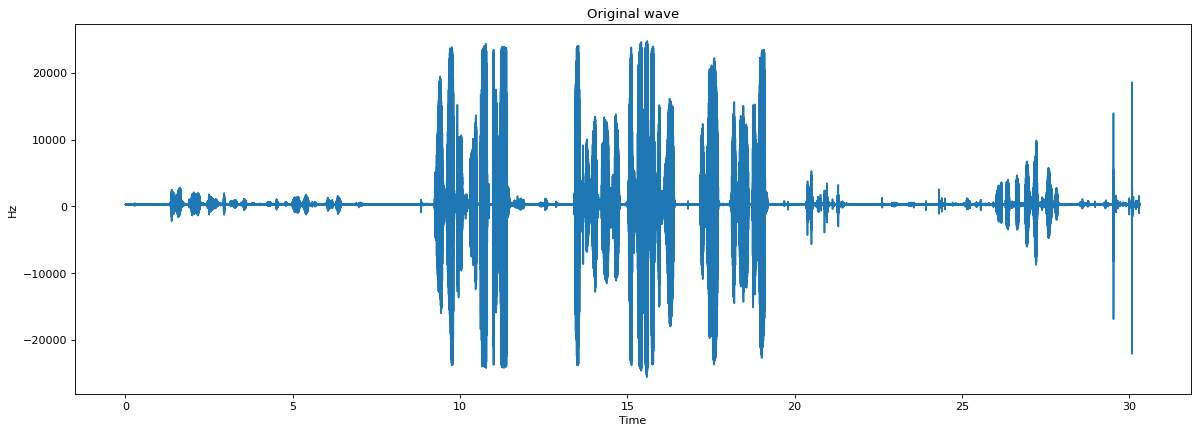

In [64]:
plt.figure(figsize=(18, 6), dpi=80)
plt.xlabel("Time")
plt.ylabel("Hz")
plt.title("Gauss processed")
plt.plot(time, origPlotData)
plt.show()